#**Comp721: Machine Learning**

##**Outlier Detection for Players**

_Authors: Thariq Singh (219063421), Saarisha Govender (221009853), Callyn Blayne Barath (220010761), Lerisha Moodley (220036955), Dhiya Dharampal (221033815)_

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial.distance import cdist

In [ ]:
# Load each file into a pandas DataFrame
coaches_career_df = pd.read_csv('coaches_career.txt', delimiter=',')
coaches_season_df = pd.read_csv('coaches_season.txt', delimiter=',')
draft_df = pd.read_csv('draft.txt', delimiter=',', encoding='ISO-8859-1',on_bad_lines='skip')
player_allstar_df = pd.read_csv('player_allstar.txt', delimiter=',')
player_playoffs_df = pd.read_csv('player_playoffs.txt', delimiter=',')
player_playoffs_career_df = pd.read_csv('player_playoffs_career.txt', delimiter=',')
player_regular_season_df = pd.read_csv('player_regular_season.txt', delimiter=',')
player_regular_season_career_df = pd.read_csv('player_regular_season_career.txt', delimiter=',')
players_df = pd.read_csv('players.txt', delimiter=',')
team_season_df = pd.read_csv('team_season.txt', delimiter=',')
teams_df = pd.read_csv('teams.txt', delimiter=',')

In [ ]:
print("Coaches career DataFrame Info:")
coaches_career_df.info()
print("Coaches season DataFrame Info:")
coaches_season_df.info()
print("Players DataFrame Info:")
players_df.info()
print("\nPlayer Regular Season DataFrame Info:")
player_regular_season_df.info()
print("\nPlayer Regular Season Career DataFrame Info:")
player_regular_season_df.info()
print("\nPlayer Playoffs DataFrame Info:")
player_playoffs_df.info()
print("\nPlayer Playoff Career DataFrame Info:")
player_playoffs_career_df.info()
print("\nPlayer Allstar DataFrame Info:")
player_allstar_df.info()

# Display the first few rows of each DataFrame
print("Coaches career DataFrame Head:")
print(coaches_career_df.head())
print("Coaches season DataFrame Info:")
print(coaches_season_df.head())
print("\nPlayers DataFrame Head:")
print(players_df.head())
print("\nPlayer Regular Season DataFrame Head:")
print(player_regular_season_df.head())
print("\nPlayer Regular Season Career DataFrame Head:")
print(player_regular_season_df.head())
print("\nPlayer Playoffs DataFrame Head:")
print(player_playoffs_df.head())
print("\nPlayer Playoff Career DataFrame Head:")
print(player_playoffs_career_df.head())
print("\nPlayer Allstar DataFrame Head:")
print(player_allstar_df.head())


Coaches career DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   coachid       254 non-null    object
 1   firstname     254 non-null    object
 2   lastname      254 non-null    object
 3   season_win    254 non-null    int64 
 4   season_loss   254 non-null    int64 
 5   playoff_win   254 non-null    int64 
 6   playoff_loss  254 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 14.0+ KB
Coaches season DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   coachid       1241 non-null   object
 1   year          1241 non-null   int64 
 2   yr_order      1241 non-null   int64 
 3   firstname     1241 non-null   object
 4   lastname      1241 non-null   object
 5  

# **Data Preprocessing - Imputation(KNN)**

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load the data
player_playoffs_df = pd.read_csv('player_playoffs.txt', delimiter=',')
player_playoffs_career_df = pd.read_csv('player_playoffs_career.txt', delimiter=',')
player_regular_season_career_df = pd.read_csv('player_regular_season_career.txt', delimiter=',')

# Function to preprocess and impute data
def preprocess_and_impute(df):
    # Keep the original dataframe for later
    original_df = df.copy()

    # Select only numeric columns for imputation
    numeric_df = df.select_dtypes(include=[float, int])

    # Initialize the KNN imputer
    imputer = KNNImputer(n_neighbors=5)

    # Perform KNN imputation
    imputed_array = imputer.fit_transform(numeric_df)
    imputed_df = pd.DataFrame(imputed_array, columns=numeric_df.columns)

    # Combine imputed numeric data with the original non-numeric data
    final_df = pd.concat([original_df.drop(numeric_df.columns, axis=1), imputed_df], axis=1)

    return final_df

# Perform preprocessing and imputation on each dataframe
player_playoffs_df = preprocess_and_impute(player_playoffs_df)
player_playoffs_career_df = preprocess_and_impute(player_playoffs_career_df)
player_regular_season_career_df = preprocess_and_impute(player_regular_season_career_df)


# Display the imputed dataframes if needed
print(player_playoffs_df.head())
print(player_playoffs_career_df.head())
print(player_regular_season_career_df.head())


        ilkid firstname   lastname team leag    year   gp  minutes   pts  \
0  ARMSTPA01       Paul  Armstrong  FTW    N  1949.0  3.0      0.0   9.0   
1  BARKECL01      Cliff     Barker  INI    N  1949.0  6.0      0.0  34.0   
2  BARNHLE01        Leo  Barnhorst  CH1    N  1949.0  2.0      0.0  22.0   
3  BEARDRA01      Ralph      Beard  INI    N  1949.0  5.0      0.0  66.0   
4  BLACKCH01    Charlie      Black  AND    N  1949.0  8.0      0.0  57.0   

   dreb  ...  stl  blk  turnover    pf   fga   fgm   fta   ftm  tpa  tpm  
0   0.0  ...  0.0  0.0       0.0   6.0  22.0   4.0   4.0   1.0  0.0  0.0  
1   0.0  ...  0.0  0.0       0.0  10.0  31.0  12.0  15.0  10.0  0.0  0.0  
2   0.0  ...  0.0  0.0       0.0  10.0  25.0   8.0   6.0   6.0  0.0  0.0  
3   0.0  ...  0.0  0.0       0.0  11.0  70.0  22.0  28.0  22.0  0.0  0.0  
4   0.0  ...  0.0  0.0       0.0  38.0  61.0  18.0  29.0  21.0  0.0  0.0  

[5 rows x 23 columns]
        ilkid firstname      lastname leag     gp  minutes     pts   d

# **Exploratory Data Analysis**


Player Regular Season DataFrame basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19112 entries, 0 to 19111
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ilkid      19112 non-null  object 
 1   year       19112 non-null  int64  
 2   firstname  19112 non-null  object 
 3   lastname   19112 non-null  object 
 4   team       19112 non-null  object 
 5   leag       19112 non-null  object 
 6   gp         19112 non-null  int64  
 7   minutes    19112 non-null  int64  
 8   pts        19112 non-null  int64  
 9   oreb       19112 non-null  int64  
 10  dreb       19112 non-null  int64  
 11  reb        19112 non-null  int64  
 12  asts       19112 non-null  int64  
 13  stl        19112 non-null  int64  
 14  blk        19112 non-null  int64  
 15  turnover   18818 non-null  float64
 16  pf         19112 non-null  int64  
 17  fga        19112 non-null  int64  
 18  fgm        19112 non-null  int64  
 19  f

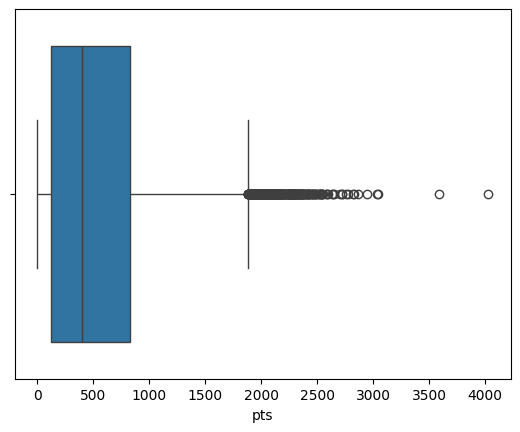

In [ ]:
print("\nPlayer Regular Season DataFrame basic info:")
print(player_regular_season_df.info())

print("\nDescriptive statistics for the Player Regular Season DataFrame:")
print(player_regular_season_df.describe())

# Average points per game across players
sns.boxplot(x='pts', data=player_regular_season_df)
plt.show()


In [ ]:
df = player_regular_season_career_df.merge(players_df[['ilkid', 'position']], on='ilkid', how='left')
df['Full_Name'] = df['firstname'] + ' ' + df['lastname']
df.drop(['firstname', 'lastname'], axis=1, inplace=True)
# Save the merged dataset
df.to_csv("merged_players_data.csv", index=False)

In [ ]:
df.columns

Index(['ilkid', 'leag', 'gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts',
       'stl', 'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa',
       'tpm', 'position', 'Full_Name'],
      dtype='object')

In [ ]:
df.describe()

,gp,minutes,pts,oreb,dreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,248.194467,5819.112530,2600.394520,229.751264,550.290237,1130.256717,580.475126,152.833998,92.721468,278.993615,604.080074,2222.528864,1003.826816,726.555467,542.027401,149.888534,50.743283
std,287.790690,8618.013116,4253.584589,504.242733,1122.839477,1983.447820,1088.771143,301.539763,258.103738,525.230940,795.994392,3472.946130,1638.995646,1230.622299,939.317882,475.563043,172.372352
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,143.000000,101.000000,0.000000,0.000000,30.000000,18.000000,0.000000,0.000000,0.000000,41.500000,104.000000,39.000000,31.000000,20.500000,0.000000,0.000000
50%,119.000000,1442.000000,633.000000,9.000000,40.000000,253.000000,122.000000,12.000000,4.000000,28.000000,212.000000,613.000000,243.000000,189.000000,130.000000,2.000000,0.000000
75%,390.500000,8430.500000,3283.000000,201.000000,577.500000,1416.500000,635.000000,155.000000,62.000000,306.000000,915.000000,2896.500000,1259.500000,887.000000,653.000000,38.500000,9.000000
max,1611.000000,57446.000000,38387.000000,6731.000000,11511.000000,23924.000000,15806.000000,3265.000000,3830.000000,4524.000000,4657.000000,28307.000000,15837.000000,13188.000000,9787.000000,6486.000000,2560.000000


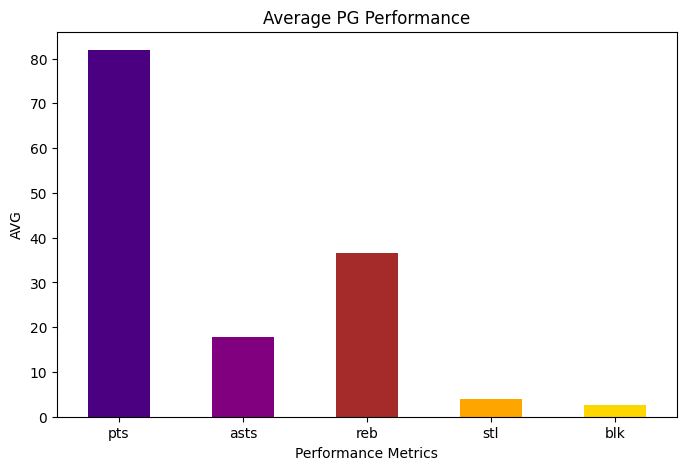

In [ ]:
metrics = player_playoffs_df[['pts', 'asts', 'reb', 'stl', 'blk']]

# Calculate the average for each metric
avg_metrics = metrics.mean()

# Plot the average performance metrics
plt.figure(figsize=(8, 5))
avg_metrics.plot(kind='bar', color=['indigo', 'purple', 'brown', 'orange', 'gold'])

# Customize plot appearance
plt.title('Average PG Performance')
plt.xlabel('Performance Metrics')
plt.ylabel('AVG')
plt.xticks(rotation=0)

# Show the plot
plt.show()

5


<ipython-input-60-cdbe10a6d572>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FullName', y=metric, data=top_scorers, palette='inferno', ax=ax,ci=None)
<ipython-input-60-cdbe10a6d572>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FullName', y=metric, data=top_scorers, palette='inferno', ax=ax,ci=None)


5


<ipython-input-60-cdbe10a6d572>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FullName', y=metric, data=top_scorers, palette='inferno', ax=ax,ci=None)
<ipython-input-60-cdbe10a6d572>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FullName', y=metric, data=top_scorers, palette='inferno', ax=ax,ci=None)


5


<ipython-input-60-cdbe10a6d572>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FullName', y=metric, data=top_scorers, palette='inferno', ax=ax,ci=None)
<ipython-input-60-cdbe10a6d572>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FullName', y=metric, data=top_scorers, palette='inferno', ax=ax,ci=None)


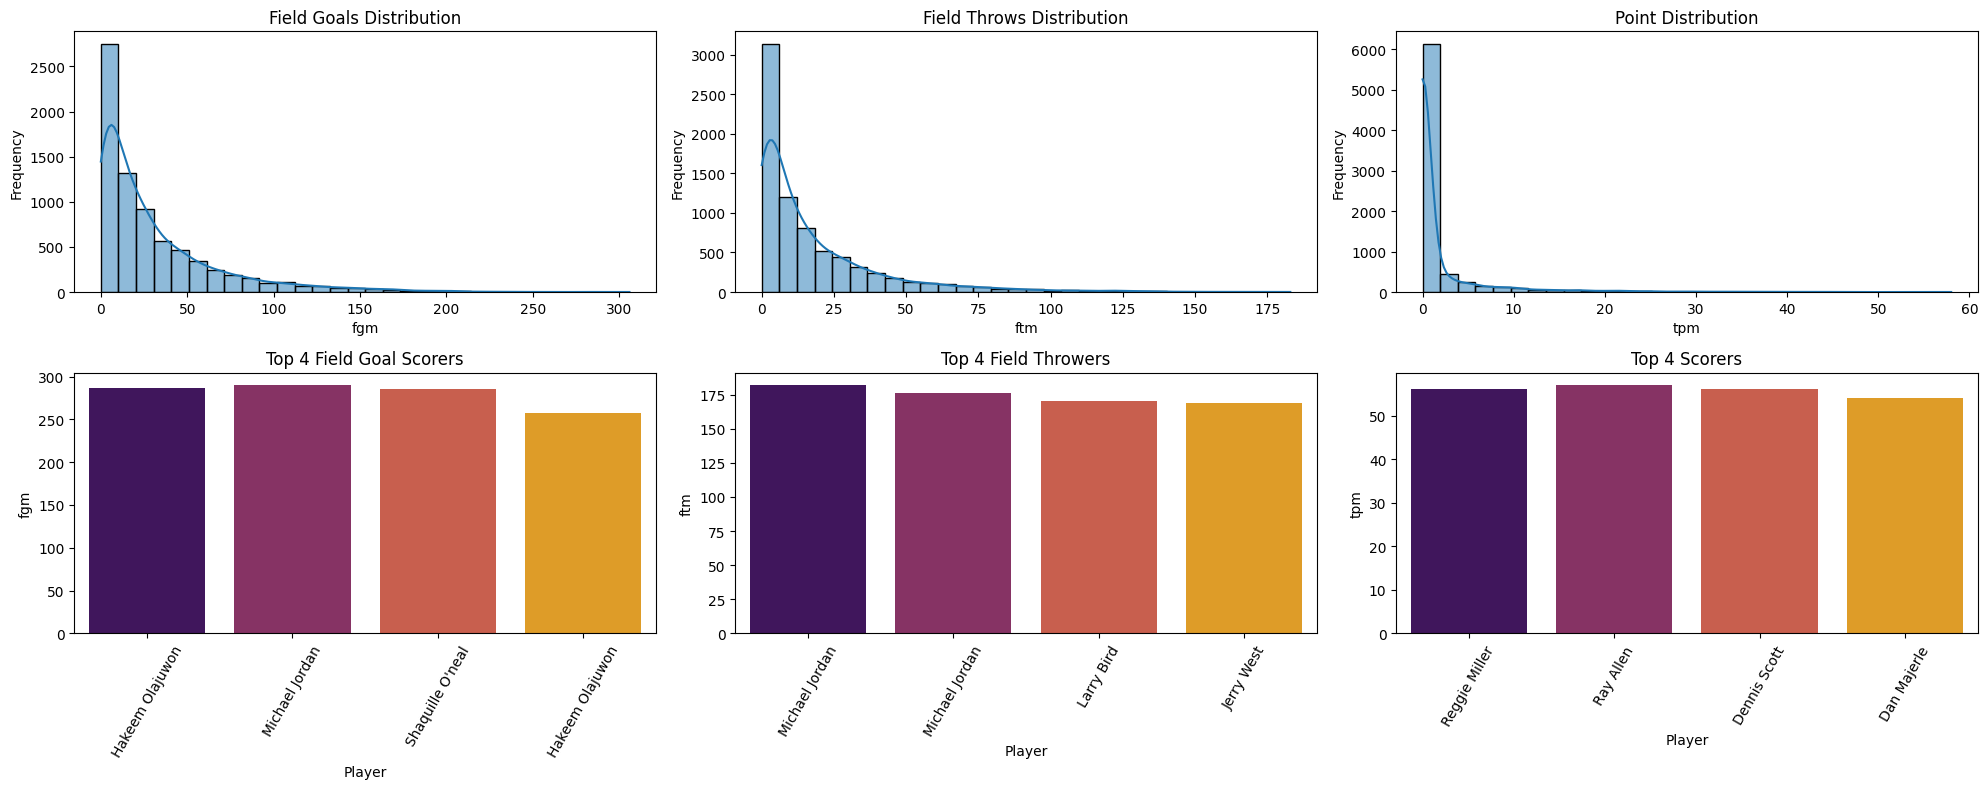

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# distribution
def plot_scoring_distribution(metric, title, ax):
    sns.histplot(player_playoffs_df[metric], kde=True, bins=30, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')

# scorers
def plot_top_scorers(metric, title, ax):
    top_scorers = player_playoffs_df.nlargest(5, metric)
    print(len(top_scorers))
    top_scorers['FullName'] = top_scorers['firstname'] + ' ' + top_scorers['lastname']
    sns.barplot(x='FullName', y=metric, data=top_scorers, palette='inferno', ax=ax,ci=None)
    ax.set_title(title)
    ax.set_xlabel('Player')
    ax.set_ylabel(metric)
    ax.set_xticks(range(len(top_scorers)-1))  # Add this line to set the number of tick labels explicitly
    ax.set_xticklabels(top_scorers.head(4)['FullName'], rotation=60)

# distribution
metrics_distribution = ['fgm','ftm','tpm']
titles_distribution = ['Field Goals Distribution','Field Throws Distribution' ,'Point Distribution']

# scorers
metrics_scorers = ['fgm','ftm','tpm']
titles_scorers = [ 'Top 4 Field Goal Scorers','Top 4 Field Throwers','Top 4 Scorers']

# grid of plots for better understanding
for i in range(3):
    plot_scoring_distribution(metrics_distribution[i], titles_distribution[i], axes[0, i])
    plot_top_scorers(metrics_scorers[i], titles_scorers[i], axes[1, i])

plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px
# Set a descriptive title for the plot
title = "Free Throw Attempts vs. Field Goal Attempts (Playoffs)"
fig = px.scatter(player_playoffs_df, x="fgm", y="ftm", trendline="ols",title=title)
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(player_playoffs_df, x="tpm", y="fgm", trendline="ols")
fig.show()

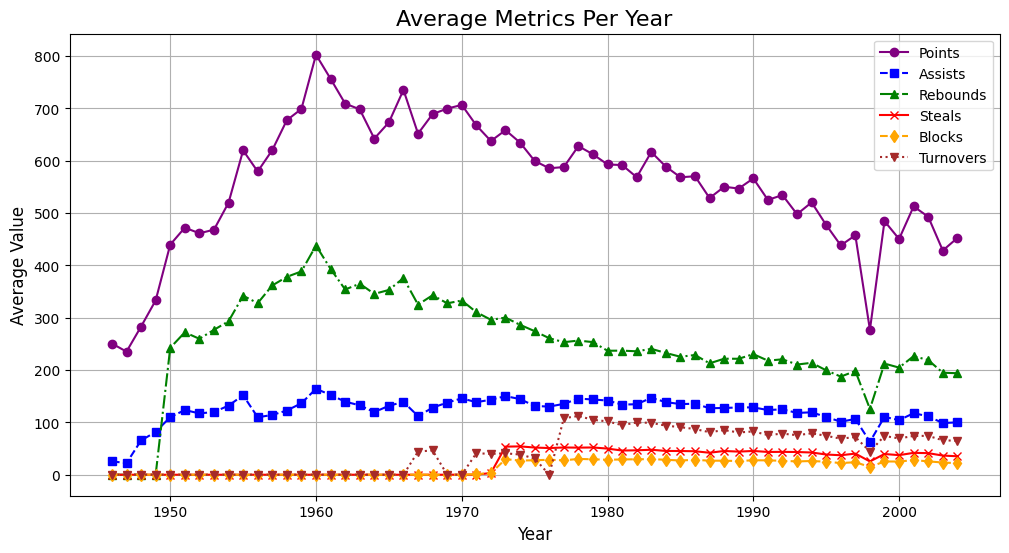

In [ ]:
# Group by year and calculate the average for important metrics
avg_metrics_per_year = player_regular_season_df.groupby('year')[['pts', 'asts', 'reb', 'stl', 'blk', 'turnover']].mean().reset_index()

# Plot all metrics on the same graph
plt.figure(figsize=(12, 6))

# Plot each metric with a different color and style
plt.plot(avg_metrics_per_year['year'], avg_metrics_per_year['pts'], label='Points', marker='o', linestyle='-', color='purple')
plt.plot(avg_metrics_per_year['year'], avg_metrics_per_year['asts'], label='Assists', marker='s', linestyle='--', color='blue')
plt.plot(avg_metrics_per_year['year'], avg_metrics_per_year['reb'], label='Rebounds', marker='^', linestyle='-.', color='green')
plt.plot(avg_metrics_per_year['year'], avg_metrics_per_year['stl'], label='Steals', marker='x', linestyle='-', color='red')
plt.plot(avg_metrics_per_year['year'], avg_metrics_per_year['blk'], label='Blocks', marker='d', linestyle='--', color='orange')
plt.plot(avg_metrics_per_year['year'], avg_metrics_per_year['turnover'], label='Turnovers', marker='v', linestyle=':', color='brown')

# Add title and labels
plt.title('Average Metrics Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)

# Display the legend
plt.legend(loc='best')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
player_playoffs_df['Full_Name'] = player_playoffs_df['firstname'] + ' ' + player_playoffs_df['lastname']
player_playoffs_df.drop(['firstname', 'lastname'], axis=1, inplace=True)

<ipython-input-71-3532272667b6>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-3532272667b6>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-3532272667b6>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-3532272667b6>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-71-3532272667b6>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

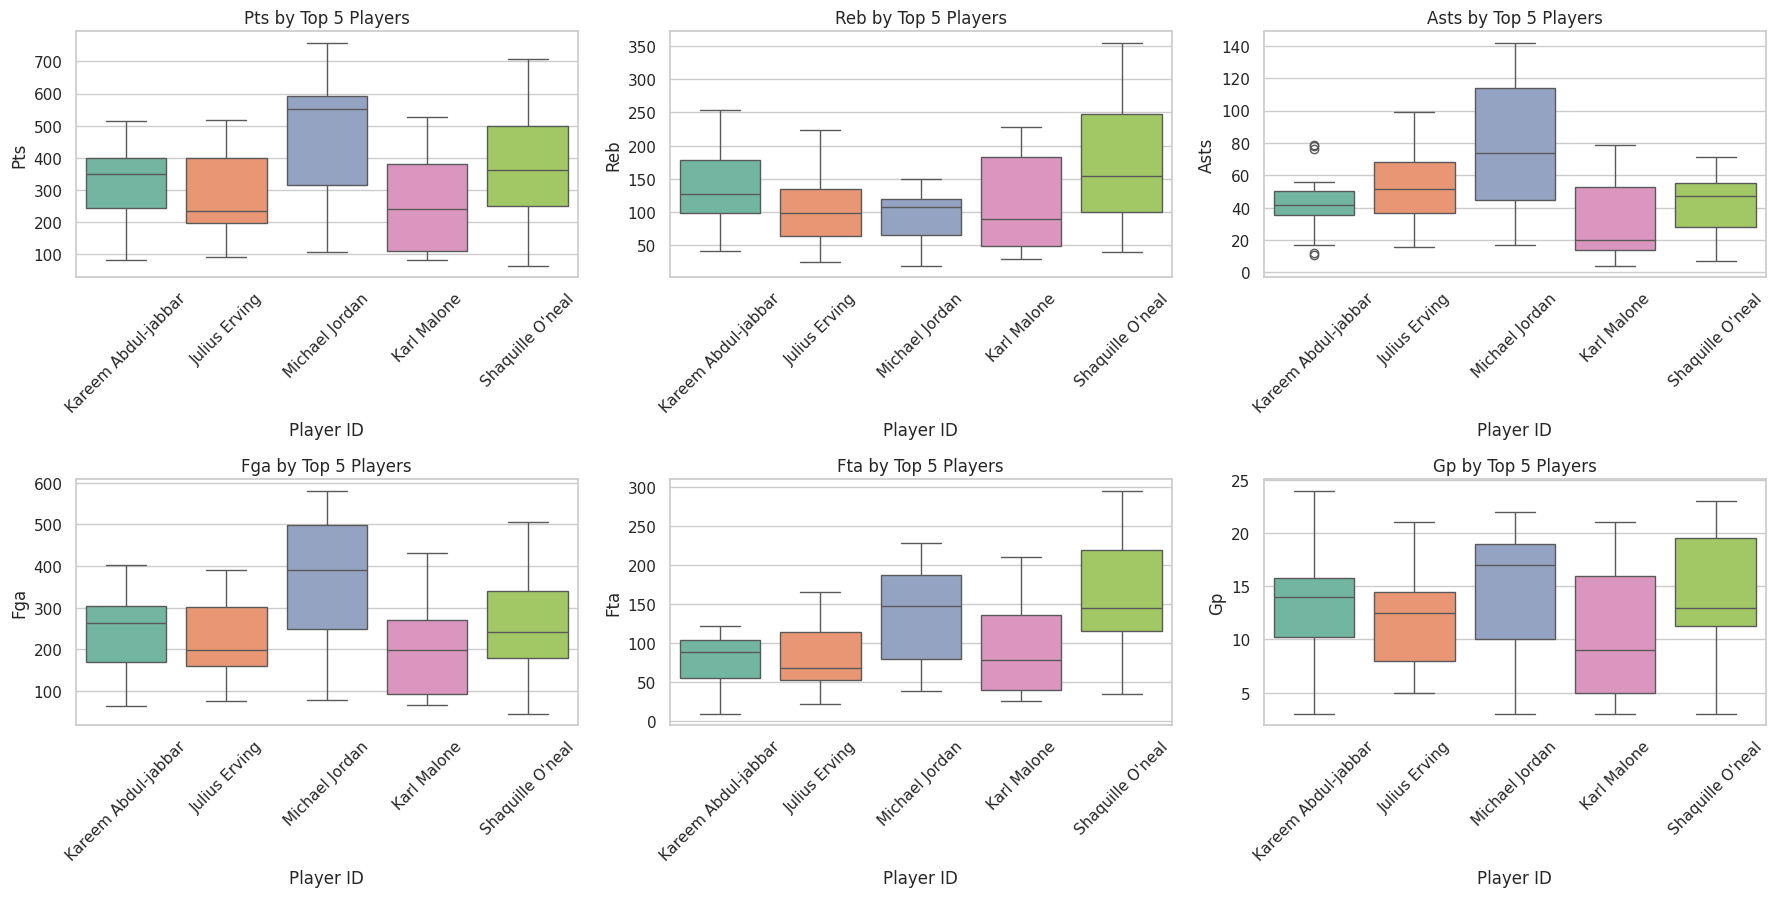

In [ ]:
# Calculate total points for each player and select the top 5 players
top_players = player_playoffs_df.groupby('Full_Name')['pts'].sum().nlargest(5).index
top_player_stats = player_playoffs_df[player_playoffs_df['Full_Name'].isin(top_players)]

# Set up the figure size
plt.figure(figsize=(18, 12))

# Define metrics to analyze for top players
metrics = ['pts', 'reb', 'asts', 'fga', 'fta','gp']

# Loop through each metric to create a box plot for the top 5 players
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Full_Name', y=metric, data=top_player_stats, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f'{metric.capitalize()} by Top 5 Players')
    plt.xlabel('Player ID')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()

# **Principal Component Analysis**

In [ ]:
non_numeric_columns = ['ilkid', 'Full_Name', 'leag', 'position']
df_numeric = df.drop(columns=non_numeric_columns)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_numeric)
X_scaled = pd.DataFrame(X_scaled)
pca = PCA(n_components = 2)
df_cluster = pd.DataFrame(pca.fit_transform(X_scaled))
df_cluster.columns = ('PC1','PC2')
df_cluster

,PC1,PC2
0,-0.077665,-0.011589
1,2.664517,-0.358996
2,0.450373,0.191110
3,-0.045626,0.011483
4,0.946369,0.046676
...,...,...
3754,-0.285644,0.011751
3755,-0.198393,-0.006060
3756,-0.287207,0.011907
3757,-0.266398,0.006227


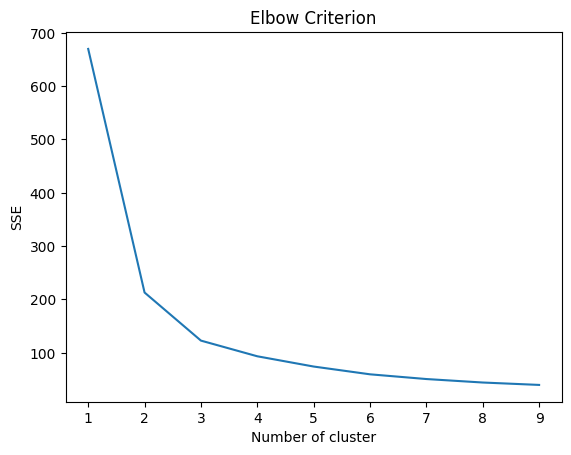

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title(f'Elbow Criterion')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

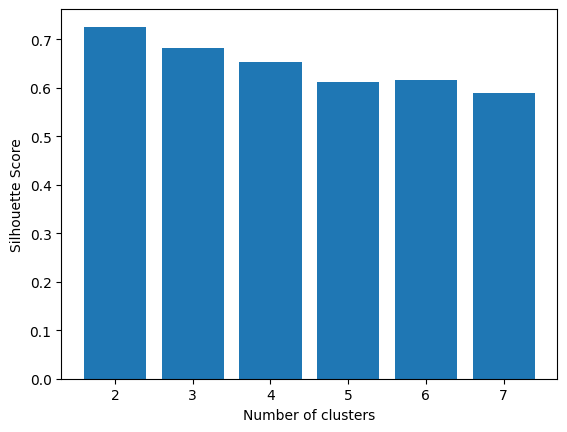

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(df_cluster, KMeans(n_clusters = n_cluster).fit_predict(df_cluster)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

# **K-Means Clustering**

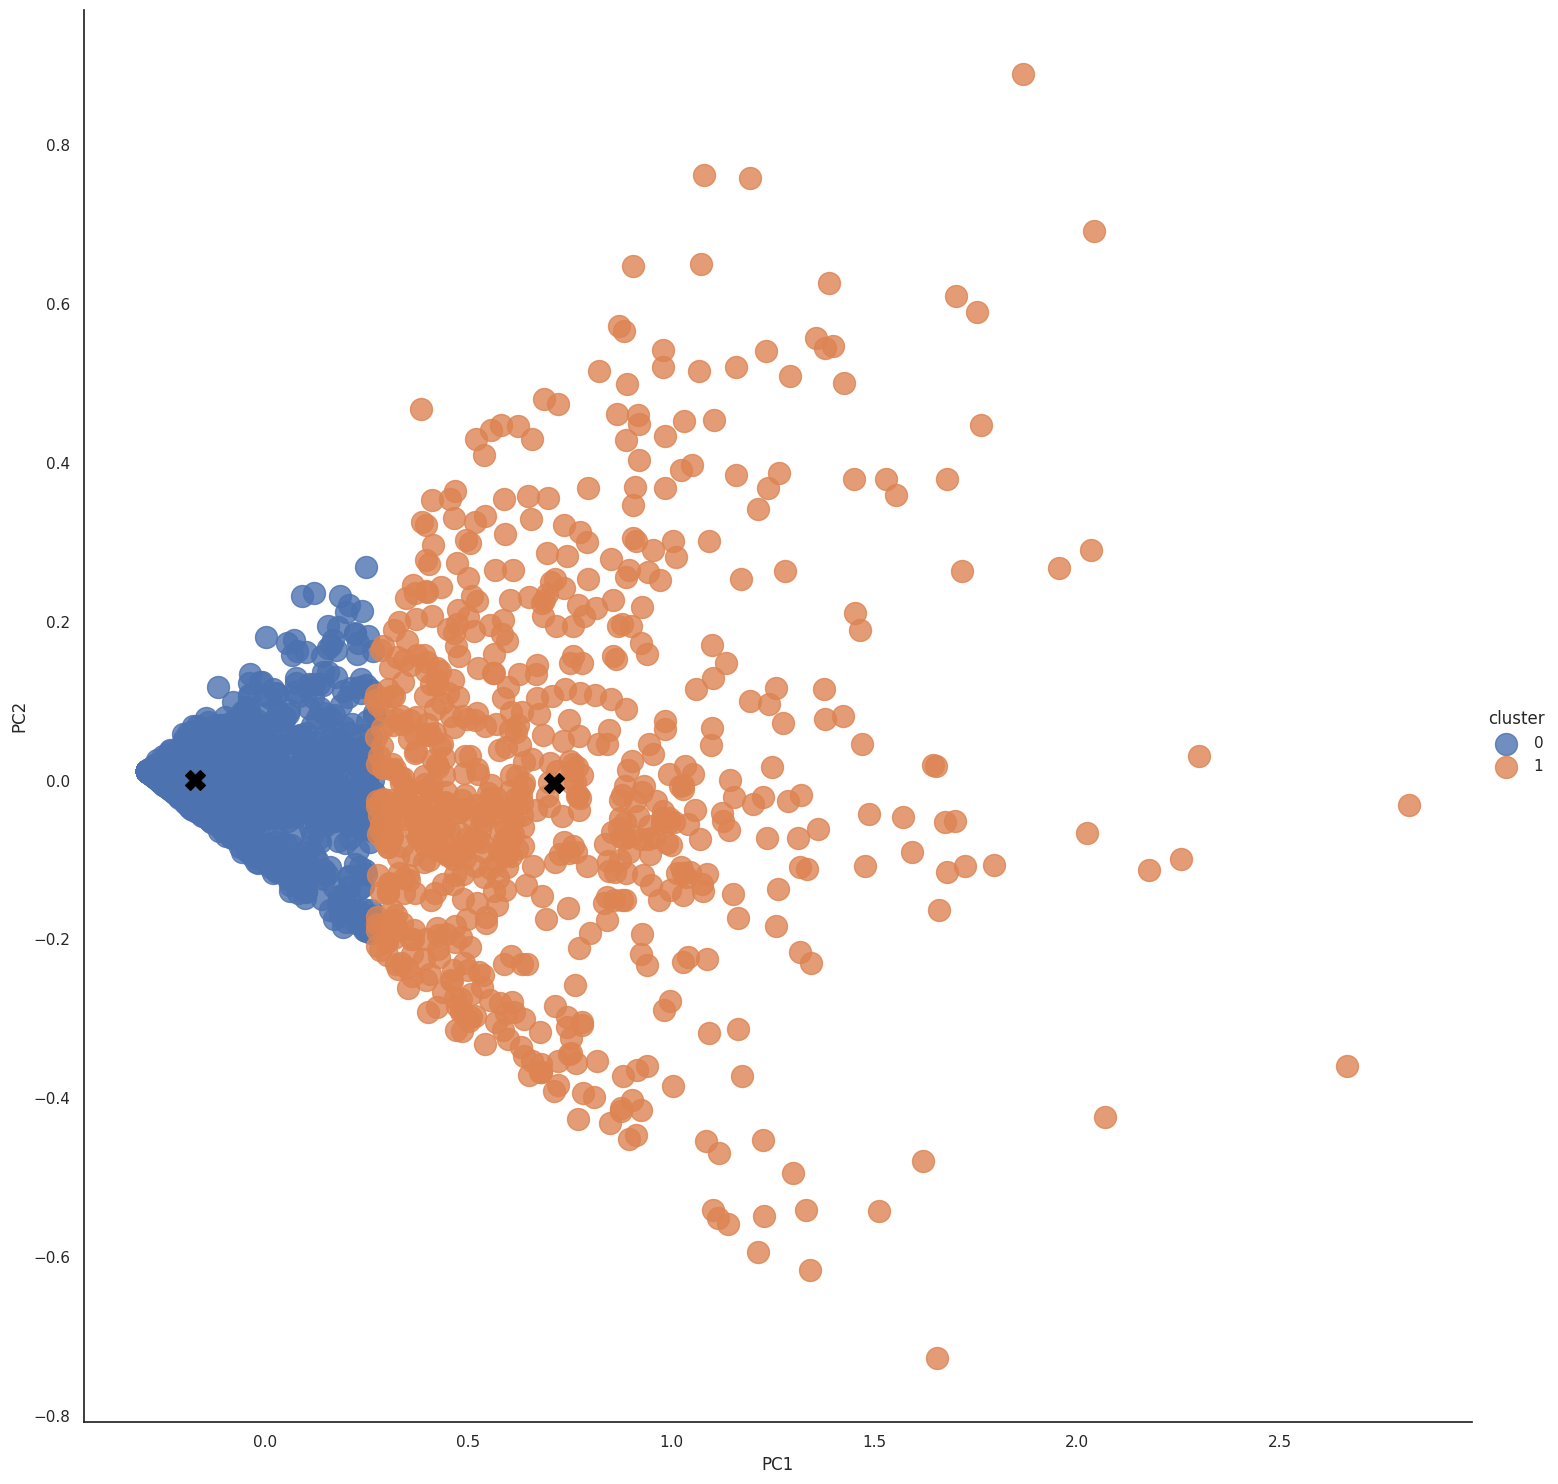

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_cluster[['PC1', 'PC2']])

# Get cluster labels
labels = kmeans.labels_

# Get centroids
centroid = kmeans.cluster_centers_

# Assign clusters to data
df_cluster['cluster'] = labels
centroid_df = pd.DataFrame(centroid, columns = ('PC1','PC2'))

# Plot clusters
sns.set(style="white")
sns.lmplot(x="PC1", y="PC2", hue='cluster', data=df_cluster, legend=True,
           fit_reg=False, height=15, scatter_kws={"s": 250})
plt.scatter(x='PC1',y='PC2',data=centroid_df, s=200, alpha =1, c='black', marker='X', label = 'Centroid')

# **Anamoly Detection**

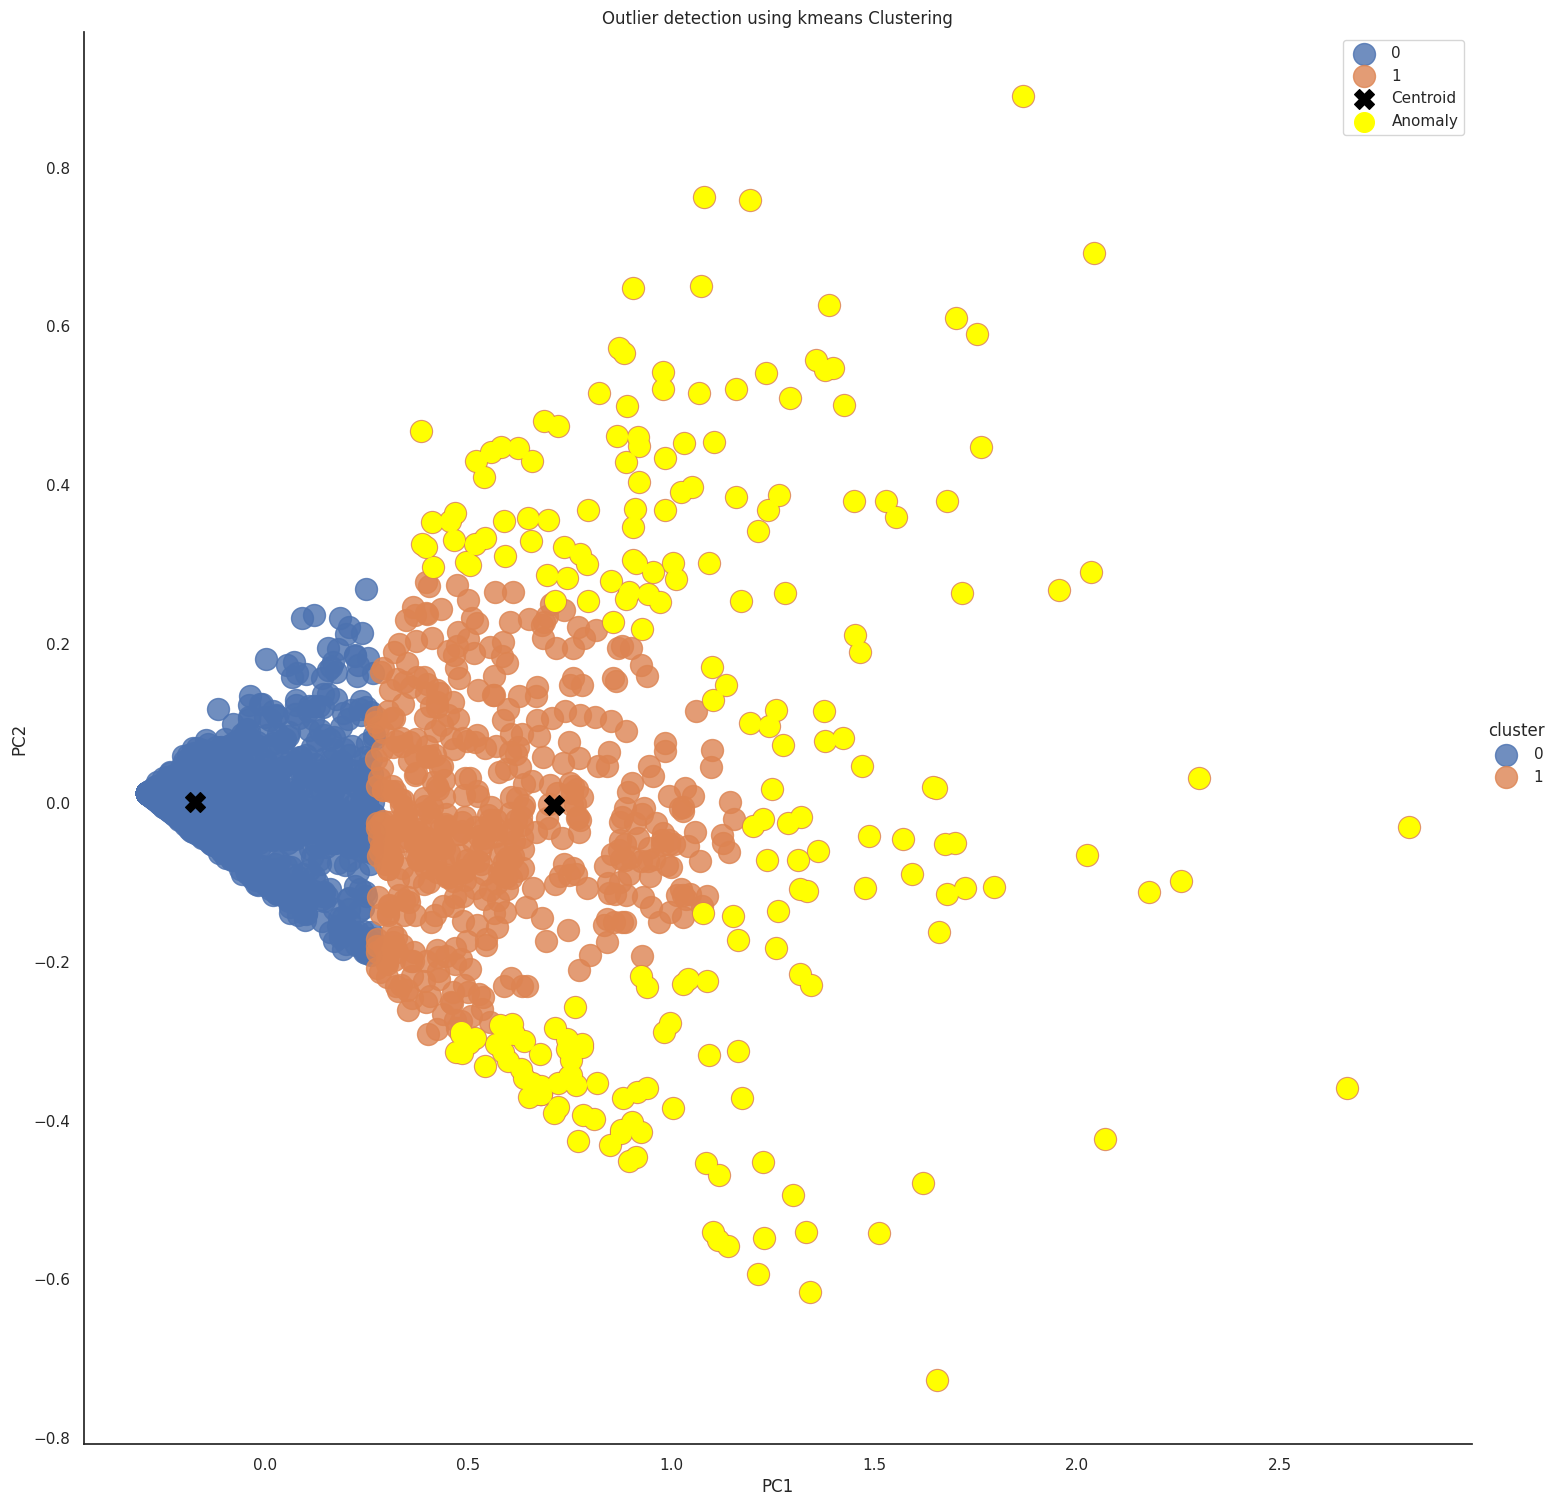

In [ ]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis = 0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    dataset['Gaussian Distribution'] = p.pdf(dataset)
    return dataset

epsilon = 0.05
centroid_df = pd.DataFrame(centroid, columns = ('PC1','PC2'))

mu, sigma = estimateGaussian(df_cluster[['PC1','PC2']])
g = multivariateGaussian(df_cluster[['PC1','PC2']], mu, sigma)
anomaly_pc1 = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC1'])
anomaly_pc2 = pd.Series(g[g['Gaussian Distribution'] < epsilon]['PC2'])

sns.set(style="white")

sns.lmplot(x="PC1", y="PC2", hue='cluster', data = df_cluster, legend=True,
                   fit_reg=False, height = 15, scatter_kws={"s": 250})

plt.scatter(x='PC1',y='PC2',data=centroid_df, s=200, alpha =1, c='black', marker='X', label = 'Centroid')
plt.title(f'Outlier detection using kmeans Clustering')
plt.scatter(anomaly_pc1, anomaly_pc2, color = 'yellow', s = 200, marker='o', label = 'Anomaly')
plt.legend()
plt.show()

In [ ]:
# Find anomalies indices
anomaly_indices = g[g['Gaussian Distribution'] < epsilon].index

# Extract id's of anomalies
anomaly_names = df.iloc[anomaly_indices]['Full_Name']

# Print anomalies along with their id's
print("Anomalies:")
clustering_outliers = []
for name, pc1, pc2 in zip(anomaly_names, anomaly_pc1, anomaly_pc2):
    clustering_outliers.append(f"{name}")
print(clustering_outliers)
print("Number of anomalies:", len(clustering_outliers))

Anomalies:
['Kareem Abdul-jabbar', 'Alvan Adams', 'Michael Adams', 'Mark Aguirre', 'Danny Ainge', 'Ray Allen', 'Kenny Anderson', 'Nick Anderson', 'Greg Anthony', 'Paul Arizin', 'Darrell Armstrong', 'Charles Barkley', 'Dick Barnett', 'Dana Barros', 'Brent Barry', 'Rick Barry', 'Elgin Baylor', 'Zelmo Beaty', 'Walt Bellamy', 'Mike Bibby', 'Chauncey Billups', 'Dave Bing', 'Larry Bird', 'Mookie Blaylock', 'Bob Boozer', 'Carl Braun', 'Bill Bridges', 'Kobe Bryant', 'Sam Cassell', 'Tom Chambers', 'Wilt Chamberlain', 'Rex Chapman', 'Maurice Cheeks', 'Doug Christie', 'Bob Cousy', 'Dave Cowens', 'Terry Cummings', 'Billy Cunningham', 'Dell Curry', 'Bob Dandridge', 'Adrian Dantley', 'Baron Davis', 'Walter Davis', 'Dave Debusschere', 'Vlade Divac', 'Clyde Drexler', 'Joe Dumars', 'James Edwards', 'Craig Ehlo', 'Dale Ellis', 'Leroy Ellis', 'Wayne Embry', 'Alex English', 'Julius Erving', 'Patrick Ewing', 'Ray Felix', 'Michael Finley', 'Sleepy Floyd', 'Larry Foust', 'Rick Fox', 'Walt Frazier', 'Harry Ga

# **Distance Based Clustering**

In [ ]:
# Load the merged dataset
df = pd.read_csv("merged_players_data.csv")
numerical_stats = ['gp', 'minutes', 'pts', 'oreb', 'dreb', 'reb', 'asts', 'stl', 'blk', 'turnover', 'pf', 'fga', 'fgm', 'fta', 'ftm', 'tpa', 'tpm']

# Normalize these columns
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_stats] = scaler.fit_transform(df[numerical_stats])

# Compute Euclidean distance from the mean for each player
mean_vector = df_normalized[numerical_stats].mean().values
df_normalized['distance'] = df_normalized[numerical_stats].apply(lambda x: np.linalg.norm(x - mean_vector), axis=1)

# Determine outliers: top 10% based on distance
threshold = df_normalized['distance'].quantile(0.970)
outliers = df_normalized[df_normalized['distance'] > threshold]

# Display outliers
print("Outliers based on distance:")
print(outliers[['Full_Name', 'distance']])

Outliers based on distance:
                Full_Name  distance
1     Kareem Abdul-jabbar  2.822399
11            Alvan Adams  1.294483
17           Mark Aguirre  1.280511
142       Charles Barkley  2.079898
189          Elgin Baylor  1.502867
...                   ...       ...
3592        Lenny Wilkens  1.426989
3595    Dominique Wilkins  1.840616
3609        Buck Williams  1.922448
3627        Herb Williams  1.216836
3636         Kevin Willis  1.820884

[113 rows x 2 columns]


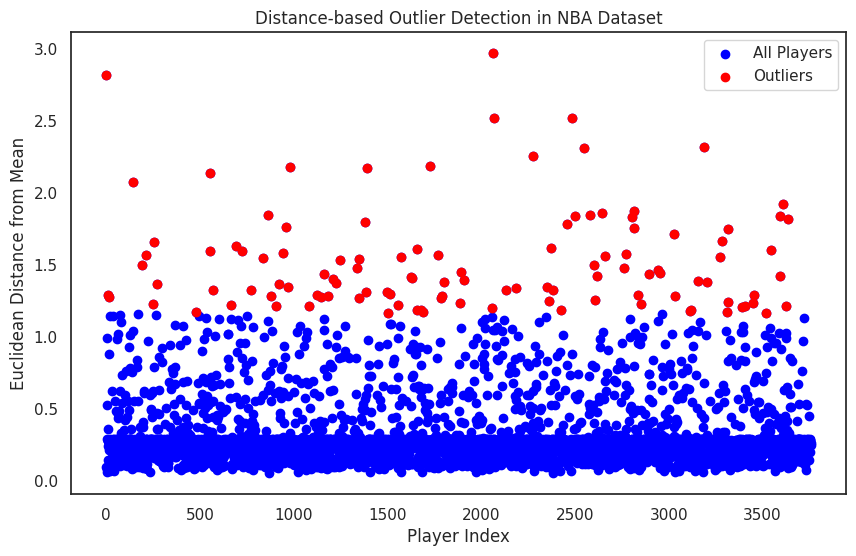

In [ ]:
# Plot all players' distances
plt.figure(figsize=(10, 6))
plt.scatter(df_normalized.index, df_normalized['distance'], label='All Players', color='blue')

# Highlight the outliers
plt.scatter(outliers.index, outliers['distance'], label='Outliers', color='red')

plt.title('Distance-based Outlier Detection in NBA Dataset')
plt.xlabel('Player Index')
plt.ylabel('Euclidean Distance from Mean')
plt.legend()
plt.show()

<ipython-input-23-2ef673b13a75>:35: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



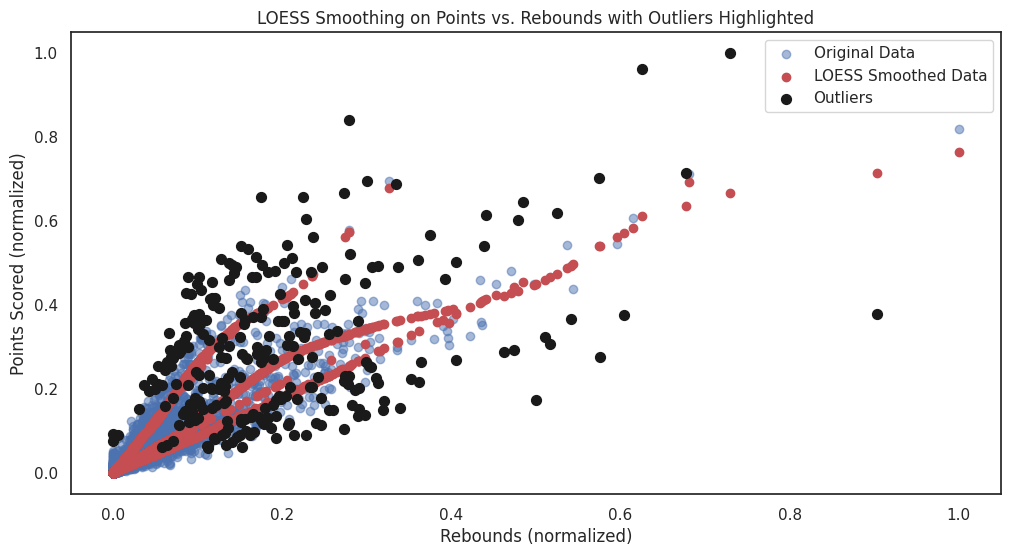

          ilkid leag      gp  minutes       pts    oreb    dreb       reb  \
0     ABDELAL01    N   256.0   3200.0  0.038164   283.0   563.0  0.035362   
1     ABDULKA01    N  1560.0  57446.0  1.000000  2975.0  9394.0  0.728975   
2     ABDULMA01    N   586.0  15633.0  0.222810   219.0   868.0  0.045436   
3     ABDULTA01    N   236.0   4808.0  0.047672   275.0   501.0  0.032436   
4     ABDURSH01    N   672.0  24862.0  0.347461  1498.0  3976.0  0.228808   
...         ...  ...     ...      ...       ...     ...     ...       ...   
3754  ZEVENPH01    N     8.0     58.0  0.000782     4.0     9.0  0.000543   
3755  ZIDEKGE01    N   135.0   1328.0  0.011801   108.0   178.0  0.011955   
3756   ZOETJI01    N     7.0     30.0  0.000052     3.0     5.0  0.000334   
3757   ZOPFBI01    N    53.0    398.0  0.003074     0.0     0.0  0.001923   
3758  ZUNICMA01    N    56.0      0.0  0.007112     0.0     0.0  0.000000   

          asts       stl  ...    tpm  position            Full_Name  \
0   

In [ ]:
# Load the data
df = pd.read_csv("merged_players_data.csv")

# Define numerical and categorical attributes
numerical_cols = ['pts', 'reb', 'asts', 'stl', 'blk']
categorical_cols = ['position', 'leag']

# Normalize numerical data
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# One-hot encode categorical data
encoder = OneHotEncoder(drop='first')
encoded_cats = encoder.fit_transform(df[categorical_cols]).toarray()
cat_feature_labels = encoder.get_feature_names_out(categorical_cols)
encoded_cats_df = pd.DataFrame(encoded_cats, columns=cat_feature_labels)

# Concatenate encoded categorical data with the original DataFrame
df = pd.concat([df, encoded_cats_df], axis=1)

# Function to apply LOESS smoothing considering both numerical and categorical attributes
def loess_with_cats(df, y_col, x_cols, cat_cols, frac=0.3):
    y = df[y_col].values
    X = df[x_cols].values
    cats = df[cat_cols].values
    n = len(df)
    loess_results = np.zeros(n)

    for i in range(n):
        distances = cdist(X, [X[i]], metric='euclidean') + cdist(cats, [cats[i]], metric='hamming')
        indices = np.argsort(distances.ravel())[:max(3, int(frac * n))]
        weights = (1 - (np.sqrt(distances[indices]) / np.sqrt(distances[indices].max()))**3)**3

        b = np.polyfit(X[indices].ravel(), y[indices].ravel(), 1, w=weights.ravel())
        loess_results[i] = np.polyval(b, X[i])

    return loess_results

# Apply LOESS smoothing to 'pts' using 'reb' as the predictor and including categorical data
df['smoothed_pts'] = loess_with_cats(df, 'pts', ['reb'], cat_feature_labels, frac=0.3)

# Detect outliers based on the residual errors from LOESS smoothing
df['residuals'] = np.abs(df['smoothed_pts'] - df['pts'])
threshold = 2 * df['residuals'].std()  # Define threshold for outlier detection
df['outlier'] = df['residuals'] > threshold

# Function to generate natural language explanations for outliers


# Visualize the results and highlight outliers
plt.figure(figsize=(12, 6))
plt.scatter(df['reb'], df['pts'], alpha=0.5, label='Original Data')
plt.scatter(df['reb'], df['smoothed_pts'], color='r', label='LOESS Smoothed Data')
outlier_points = df[df['outlier']]
plt.scatter(outlier_points['reb'], outlier_points['pts'], color='k', s=50, label='Outliers')
plt.title('LOESS Smoothing on Points vs. Rebounds with Outliers Highlighted')
plt.xlabel('Rebounds (normalized)')
plt.ylabel('Points Scored (normalized)')
plt.legend()
plt.show()
print(df)

In [ ]:
def explain_outlier(row):
    if row['outlier']:
        return f"Player with ID {row['Full_Name']} is considered an outlier due to unusual points scored ({row['pts']*100:.1f} normalized points) relative to others with similar playing time and position."
    else:
        return ""
# Apply explanations to outliers
df['explanation'] = df.apply(explain_outlier, axis=1)
print(df['explanation'])

0                                                        
1       Player with ID Kareem Abdul-jabbar is consider...
2       Player with ID Mahmo Abdul-rauf is considered ...
3                                                        
4                                                        
                              ...                        
3754                                                     
3755                                                     
3756                                                     
3757                                                     
3758                                                     
Name: explanation, Length: 3759, dtype: object


In [ ]:
# Open a text file in write mode
with open('outlier_explanations.txt', 'w') as file:
    # Iterate over the DataFrame's 'explanation' column
    for explanation in df[df['outlier']]['explanation']:
        file.write(explanation + '\n')  # Write each explanation to a new line

In [ ]:
# Load the main dataset
allstar_df = pd.read_csv('player_allstar.txt', delimiter=',')
allstar_df['Full_Name'] = allstar_df['firstname'] + ' ' + allstar_df['lastname']
allstar_df.drop(['firstname', 'lastname'], axis=1, inplace=True)
allstar_ids = allstar_df['Full_Name'].unique()

0       0
1       0
2       0
3       0
4       0
       ..
3754    0
3755    0
3756    0
3757    0
3758    0
Name: is_allstar, Length: 3759, dtype: int64
['ABDULKA01' 'ABDULMA01' 'ADAMSAL01' 'AGUIRMA01' 'ANDERCA01' 'ANDERNI01'
 'ANDERSH01' 'ARCHINA01' 'ARIZIPA01' 'ATTLEAL01' 'AUGMOST01' 'BARKLCH01'
 'BARNEDI01' 'BARRYRI01' 'BARRYRI01' 'BAYLOEL01' 'BEARDBU01' 'BINGDA01'
 'BIRDLA01' 'BIRDSOT01' 'BLACKRO01' 'BLOUNCO01' 'BOCKHAR01' 'BOERWTO01'
 'BOGUEMU01' 'BRADLBI01' 'BREWEJI01' 'BRIDGBI01' 'BRIDGJU01' 'BROWNFR01'
 'BROWNPJ01' 'BROWNRO01' 'CAGEMI01' 'CALVIMA01' 'CAMPBTO01' 'CARRKE01'
 'CARROJO01' 'CARTEGE01' 'CARTWBI01' 'CATCHHA01' 'CHAMBTO01' 'CHANEDO01'
 'CHAPMRE01' 'CHEANCA01' 'CHRISDO01' 'CLEAMJI01' 'COLEMJA01' 'CONNELE01'
 'COOPEMI01' 'CUMMITE01' 'CURETEA01' 'DAMPILO01' 'DANDRBO01' 'DANTLAD01'
 'DAUGHBR01' 'DAVISAN01' 'DAVISDA01' 'DAVISJO01' 'DAVISTE01' 'DAVISWA03'
 'DONALJA01' 'DREWJO01' 'DREWLA01' 'DUDLECH02' 'DUKESWA01' 'DUMARJO01'
 'DUNNTR01' 'EATONMA01' 'EDWARJA01' 'EHLOCR01' '

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6854: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



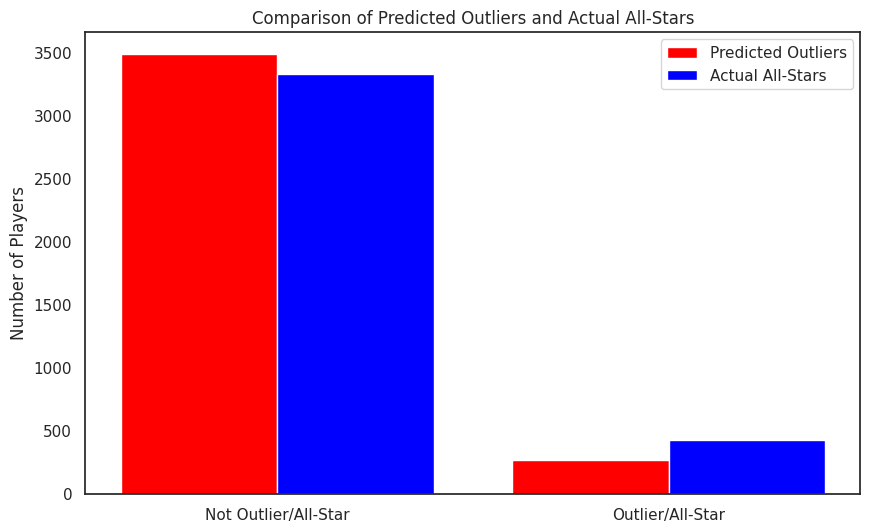

In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


# Mark all-stars in your main dataframe
df['is_allstar'] = df['Full_Name'].isin(allstar_ids).astype(int)
print(df['is_allstar'] )

# Assuming 'outlier' column is 1 for outliers and 0 otherwise (already calculated in your script)
predicted_outliers = df[df['outlier'] == True]['ilkid'].values
print(predicted_outliers)

# Metrics calculation
y_true = df['is_allstar']  # True labels
print(y_true)
y_pred = df['outlier']  # Predicted labels

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally, check which outliers are all-stars
outliers_as_allstars = df[(df['outlier'] == 1) & (df['is_allstar'] == 1)]
print(outliers_as_allstars[['Full_Name', 'pts', 'reb', 'asts', 'blk', 'stl', 'is_allstar']])

# Visualization of results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist([y_pred, y_true], bins=2, color=['red', 'blue'], label=['Predicted Outliers', 'Actual All-Stars'])
plt.xticks([0.25, 0.75], ["Not Outlier/All-Star", "Outlier/All-Star"])
plt.ylabel('Number of Players')
plt.legend()
plt.title('Comparison of Predicted Outliers and Actual All-Stars')
plt.show()


In [ ]:
allstar_df['Full_Name'] = allstar_df['Full_Name'].str.strip().str.upper()
df['Full_Name'] = df['Full_Name'].str.strip().str.upper()

# Filter the main dataframe for outliers
outliers_df = df[df['outlier'] == True]

# Merge the all-star data with the filtered outliers on 'ilkid'
common_outliers = pd.merge(outliers_df, allstar_df, on='Full_Name', how='inner')

print(common_outliers)

       ilkid_x leag_x    gp_x  minutes_x     pts_x  oreb_x  dreb_x     reb_x  \
0    ABDULKA01      N  1560.0    57446.0  1.000000  2975.0  9394.0  0.728975   
1    ABDULKA01      N  1560.0    57446.0  1.000000  2975.0  9394.0  0.728975   
2    ABDULKA01      N  1560.0    57446.0  1.000000  2975.0  9394.0  0.728975   
3    ABDULKA01      N  1560.0    57446.0  1.000000  2975.0  9394.0  0.728975   
4    ABDULKA01      N  1560.0    57446.0  1.000000  2975.0  9394.0  0.728975   
..         ...    ...     ...        ...       ...     ...     ...       ...   
737  WORTHJA01      N   926.0    30001.0  0.425144  1561.0  3147.0  0.196790   
738  WORTHJA01      N   926.0    30001.0  0.425144  1561.0  3147.0  0.196790   
739  WORTHJA01      N   926.0    30001.0  0.425144  1561.0  3147.0  0.196790   
740  WORTHJA01      N   926.0    30001.0  0.425144  1561.0  3147.0  0.196790   
741  ZASLOMA01      N   540.0     6760.0  0.208143     0.0     0.0  0.036114   

       asts_x     stl_x  ...  stl_y  bl

In [ ]:
num_correct_predictions = common_outliers.shape[0]
print("Number of correctly predicted outliers (All-Stars also flagged as outliers):", num_correct_predictions)

# Optionally, save to a CSV file
common_outliers.to_csv("common_outliers_allstars.csv", index=False)

Number of correctly predicted outliers (All-Stars also flagged as outliers): 742


In [ ]:
import pandas as pd

# Assuming all previous data loading and cleaning has been done
# Load and clean your dataframes (df and allstar_df) as previously described

# Define actual positives (all-stars) and predictions
actual_positives = df['Full_Name'].isin(allstar_df['Full_Name'])
predicted_positives = df['outlier'] == 1
predicted_negatives = ~predicted_positives

# True Positives: predicted as outliers and are actual all-stars
TP = df[predicted_positives & actual_positives].shape[0]

# False Positives: predicted as outliers but are not actual all-stars
FP = df[predicted_positives & ~actual_positives].shape[0]

# True Negatives: not predicted as outliers and are not all-stars
TN = df[predicted_negatives & ~actual_positives].shape[0]

# False Negatives: not predicted as outliers but are actual all-stars
FN = df[predicted_negatives & actual_positives].shape[0]

# Calculate Accuracy, Precision, and Recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

# Optionally, calculate F1 Score if needed
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.8935887204043629
Precision: 0.5880149812734082
Recall: 0.3512304250559284
F1 Score: 0.4397759103641456


In [ ]:
player_allstar_df['Full_Name'] = player_allstar_df['firstname'] + ' ' + player_allstar_df['lastname']
player_allstar_df.drop(['firstname', 'lastname'], axis=1, inplace=True)

In [ ]:
player_regular_season_career_df['Full_Name'] = player_regular_season_career_df['firstname'] + ' ' + player_regular_season_career_df['lastname']
player_regular_season_career_df.drop(['firstname', 'lastname'], axis=1, inplace=True)

In [ ]:
#Evaluation function that takes a unique set of player fullname as input and
#compares them against the outstanding players chosen as allstars.
def evaluate(outlier_points):
  outlier_points = np.array(outlier_points)

  #Number of true positives.
  tp = 0
  #Number of true negatives.
  tn = 0
  #Number of false postives.
  fp = 0
  #Number of false negatives.
  fn = 0
  #Compare data against allstar players data.
  allstar_players = player_allstar_df['Full_Name'].unique()
  for x in range(len(outlier_points)):
    outlier_points[x] = outlier_points[x].upper().strip()
  if "CAMBYMA01" in outlier_points:
    print("Camby")
  if "KIDDJA01" in outlier_points:
    print("Kidd")
  if "STOUDAM01" in outlier_points:
    print("Am")
  if "JAMESLE01" in outlier_points:
    print("James")
  if "EVANSRE01" in outlier_points:
    print("Reggie Evans")

  for x in range(len(allstar_players)):
    allstar_players[x] = allstar_players[x].upper().strip()
  #Draw on the dataset of all players.
  reg_season_players = player_regular_season_career_df['Full_Name'].unique()
  #Caluclate the number of true postives, false postives, true negatives, and false negatives.
  for outlier in outlier_points:
    if outlier in allstar_players:
      tp = tp + 1
    else:
      fp = fp + 1
  fn = len(allstar_players) - tp
  tn = len(reg_season_players) - fp
  #Calculate the accuracy.
  accuracy = float(tp+tn)/(tp+fp+tn+fn)
  #Calculate the percision.
  precision = float(tp)/(tp + fp) if tp + fp > 0 else 0
  #Calculate the recall.
  recall = float(tp)/(tp+fn) if tp + fn > 0 else 0
  #Calculate the f1 score.
  f1 = float(2 * precision * recall)/(precision + recall) if precision + recall > 0 else 0
  #Print the results.
  print("Accuracy:" + str(accuracy))
  print("Precision: " + str(precision))
  print("Recall: " + str(recall))
  print("F1 Score: " + str(f1) + '\n')
  print(str(tp) + " " + str(fp) + " " + str(tn) + str(fn))
  metrics = {
       "accuracy": (tp + tn) / (tp + fp + tn + fn),
       "precision": tp / (tp + fp) if (tp + fp) > 0 else 0,
       "recall": tp / (tp + fn) if (tp + fn) > 0 else 0,
       "f1_score": (2 * (tp / (tp + fp))) if (tp + fp > 0 and tp + fn > 0) else 0
   }


  return metrics


#LOESS smoothing
loess_outliers=evaluate(outlier_points['Full_Name'].unique())
print(outlier_points['Full_Name'].unique())
#Clustering based outlier detection
clustering_outliers=evaluate(list(set(clustering_outliers)))
#Distance based outlier detection
distance_outliers=evaluate(outliers['Full_Name'].unique())


Accuracy:0.9042579994960948
Precision: 0.5817490494296578
Recall: 0.3617021276595745
F1 Score: 0.44606413994169103

153 110 3436270
['Kareem Abdul-jabbar' 'Mahmo Abdul-rauf' 'Alvan Adams' 'Mark Aguirre'
 'Cadillac Anderson' 'Nick Anderson' 'Shandon Anderson' 'Nate Archibald'
 'Paul Arizin' 'Alvin Attles' 'Stacey Augmon' 'Charles Barkley'
 'Dick Barnett' 'Rick Barry' 'Elgin Baylor' 'Butch Beard' 'Dave Bing'
 'Larry Bird' 'Otis Birdsong' 'Rolando Blackman' 'Corie Blount'
 'Arlen Bockhorn' 'Tom Boerwinkle' 'Muggsy Bogues' 'Bill Bradley'
 'Jim Brewer' 'Bill Bridges' 'Junior Bridgeman' 'Fred Brown' 'P.j. Brown'
 'Rogera Brown' 'Michael Cage' 'Mack Calvin' 'Tony Campbell' 'Kenny Carr'
 'Joe Barry Carroll' 'George Carter' 'Bill Cartwright' 'Harvey Catchings'
 'Tom Chambers' 'Don Chaney' 'Rex Chapman' 'Calbert Cheaney'
 'Doug Christie' 'Jim Cleamons' 'Jack Coleman' 'Lester Conner'
 'Michael Cooper' 'Terry Cummings' 'Earl Cureton' 'Lou Dampier'
 'Bob Dandridge' 'Adrian Dantley' 'Brad Daugherty'

In [ ]:
def confusion_mat(outlier_points):
  outlier_points = np.array(outlier_points)
  #Number of true positives.
  tp = 0
  #Number of true negatives.
  tn = 0
  #Number of false postives.
  fp = 0
  #Number of false negatives.
  fn = 0
  #Compare data against allstar players data.
  allstar_players = player_allstar_df['Full_Name'].unique()
  for x in range(len(outlier_points)):
    outlier_points[x] = outlier_points[x].upper().strip()
  for x in range(len(allstar_players)):
    allstar_players[x] = allstar_players[x].upper().strip()
  #Draw on the dataset of all players.
  reg_season_players = player_regular_season_career_df['Full_Name'].unique()
  #Caluclate the number of true postives, false postives, true negatives, and false negatives.
  for outlier in outlier_points:
    if outlier in allstar_players:
      tp = tp + 1
    else:
      fp = fp + 1
  fn = len(allstar_players) - tp
  tn = len(reg_season_players) - fp
  return tp,tn,fp,fn


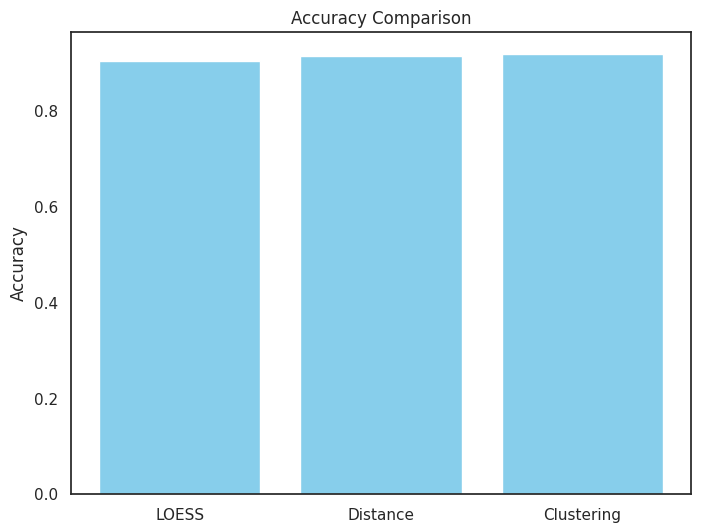

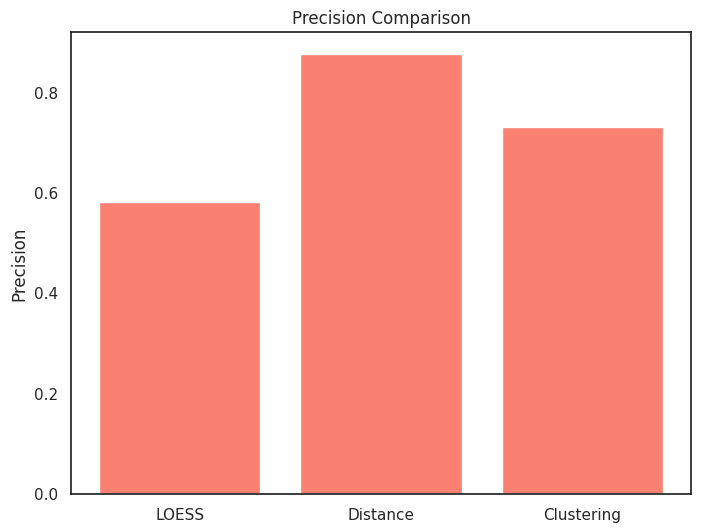

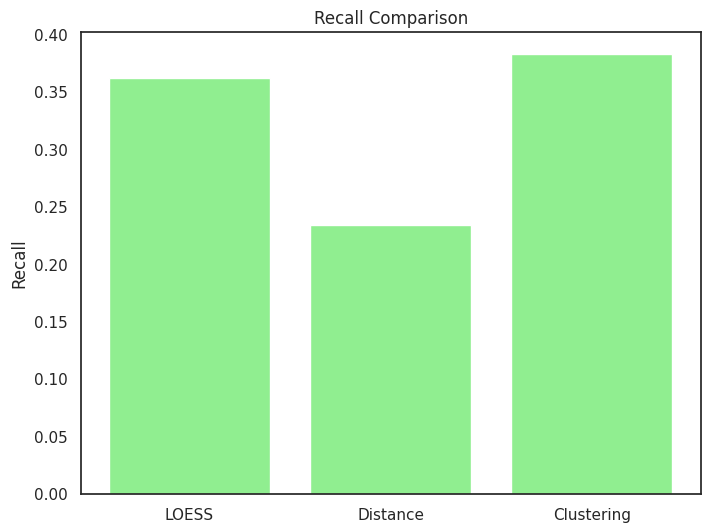

In [ ]:
import matplotlib.pyplot as plt

# Define outlier detection methods and their corresponding metrics
methods = ['LOESS', 'Distance', 'Clustering']
accuracies = [loess_outliers['accuracy'],distance_outliers['accuracy'],clustering_outliers['accuracy']]
precisions = [loess_outliers['precision'], distance_outliers['precision'], clustering_outliers['precision']]
recalls = [loess_outliers['recall'],distance_outliers['recall'] ,clustering_outliers['recall']]

# Plotting accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color='skyblue')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
# Plotting precision comparison
plt.figure(figsize=(8, 6))
plt.bar(methods, precisions, color='salmon')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.show()
# Plotting recall comparison
plt.figure(figsize=(8, 6))
plt.bar(methods, recalls, color='lightgreen')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.show()

Confusion Matrix for LOESS Smoothing:


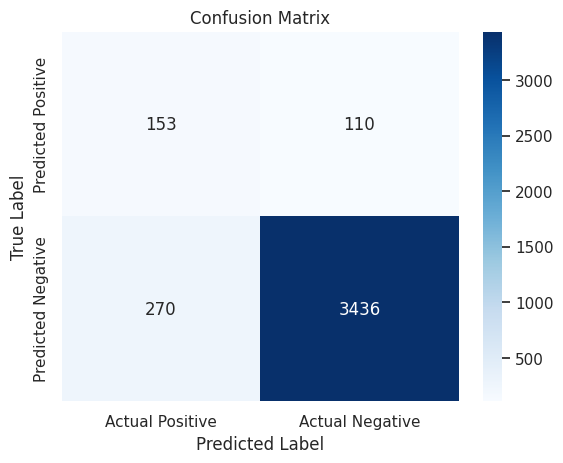

Confusion Matrix for Distance Based Outlier Detection:


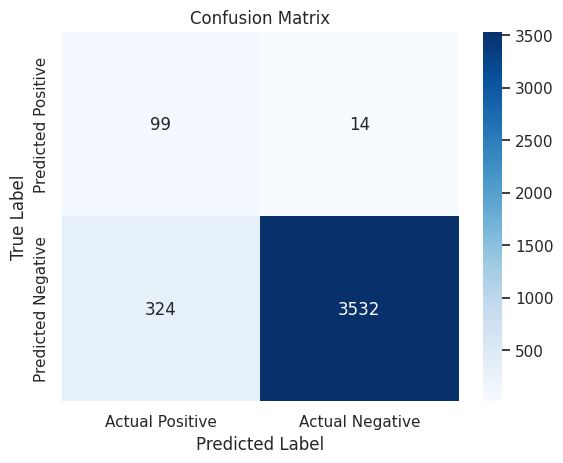

Confusion Matrix for Clustering Based Outlier Detection:


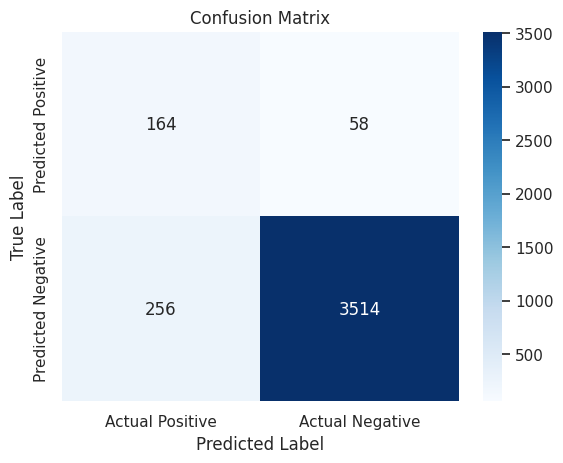

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(tp, tn, fp, fn):
    confusion_matrix = np.array([[tp, fp], [fn, tn]])

    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g',
                xticklabels=['Actual Positive', 'Actual Negative'],
                yticklabels=['Predicted Positive', 'Predicted Negative'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# LOESS smoothing
tp_loess,tn_loess,fp_loess,fn_loess= confusion_mat(outlier_points["Full_Name"].unique())

# Distance based outlier detection
tp_distance,tn_distance,fp_distance,fn_distance  = confusion_mat(outliers['Full_Name'].unique())

# Clustering based outlier detection
tp_clustering,tn_clustering,fp_clustering,fn_clustering = 164, 3514, 58, 256


# Plotting confusion matrices for each method
print("Confusion Matrix for LOESS Smoothing:")
plot_confusion_matrix(tp_loess, tn_loess, fp_loess, fn_loess)

print("Confusion Matrix for Distance Based Outlier Detection:")
plot_confusion_matrix(tp_distance, tn_distance, fp_distance, fn_distance)

print("Confusion Matrix for Clustering Based Outlier Detection:")
plot_confusion_matrix(tp_clustering, tn_clustering, fp_clustering, fn_clustering)
